In [1]:
!apt-get update
!apt-get install -y wget unzip git

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:5 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:6 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,545 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [3,205 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-security/main amd64 P

In [7]:
!mkdir -p /content/data/TUM
%cd /content/data/TUM

!wget https://vision.in.tum.de/rgbd/dataset/freiburg1/rgbd_dataset_freiburg1_desk.tgz
!tar -xvzf rgbd_dataset_freiburg1_desk.tgz


/content/data/TUM
--2025-05-06 18:01:25--  https://vision.in.tum.de/rgbd/dataset/freiburg1/rgbd_dataset_freiburg1_desk.tgz
Resolving vision.in.tum.de (vision.in.tum.de)... 131.159.19.110, 2a09:80c0:18::1110
Connecting to vision.in.tum.de (vision.in.tum.de)|131.159.19.110|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cvg.cit.tum.de/rgbd/dataset/freiburg1/rgbd_dataset_freiburg1_desk.tgz [following]
--2025-05-06 18:01:26--  https://cvg.cit.tum.de/rgbd/dataset/freiburg1/rgbd_dataset_freiburg1_desk.tgz
Resolving cvg.cit.tum.de (cvg.cit.tum.de)... 131.159.19.110, 2a09:80c0:18::1110
Connecting to cvg.cit.tum.de (cvg.cit.tum.de)|131.159.19.110|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 344011403 (328M) [application/x-gzip]
Saving to: ‘rgbd_dataset_freiburg1_desk.tgz’

rgbd_dataset_freibu 100%[===================>] 328.07M  21.0MB/s    in 17s     

2025-05-06 18:01:43 (19.6 MB/s) - ‘rgbd_dataset_freiburg1_desk.t

In [5]:
!pip install -q imageio opencv-python scikit-image lpips
!pip install -q torch torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 89.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 69.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.8 MB/s eta 0:00:00


<ipython-input-8-f8f528b5789c>:14: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(img_path)


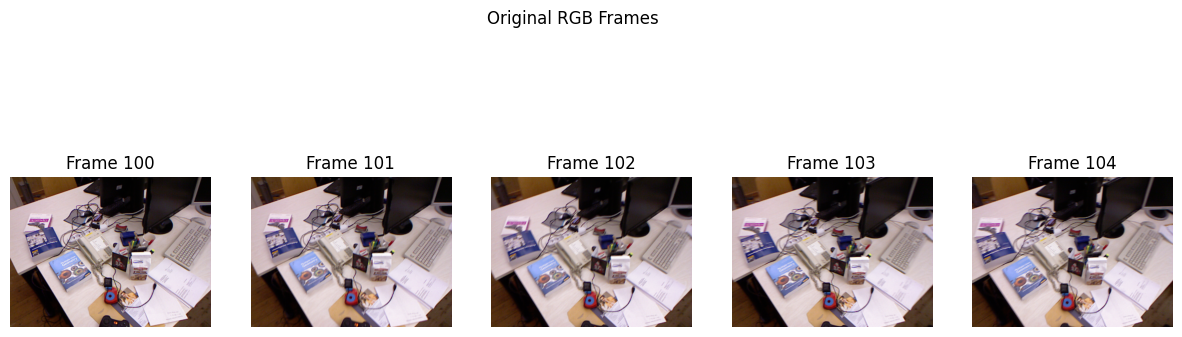

In [8]:
import os
import cv2
import imageio
import matplotlib.pyplot as plt

image_folder = "/content/data/TUM/rgbd_dataset_freiburg1_desk/rgb"
images = sorted([f for f in os.listdir(image_folder) if f.endswith(".png")])

sample_images = images[100:105]  # Take 5 images

fig, axs = plt.subplots(1, 5, figsize=(15, 5))
for i, img_name in enumerate(sample_images):
    img_path = os.path.join(image_folder, img_name)
    img = imageio.imread(img_path)
    axs[i].imshow(img)
    axs[i].set_title(f"Frame {100+i}")
    axs[i].axis('off')
plt.suptitle("Original RGB Frames")
plt.show()

In [9]:
# STEP 4: Simulate rendered images by applying a simple transform (mock Photo-SLAM output)
def mock_render(image):
    blurred = cv2.GaussianBlur(image, (9, 9), 3)
    return blurred

rendered_images = []

for img_name in sample_images:
    img_path = os.path.join(image_folder, img_name)
    img = cv2.imread(img_path)
    rendered = mock_render(img)
    rendered_images.append(rendered)

In [10]:
# STEP 5: Compute PSNR, SSIM, LPIPS for each frame
import numpy as np
from skimage.metrics import peak_signal_noise_ratio, structural_similarity
import torch
import lpips

loss_fn = lpips.LPIPS(net='alex')

psnr_list, ssim_list, lpips_list = [], [], []

for i, img_name in enumerate(sample_images):
    original = cv2.imread(os.path.join(image_folder, img_name))
    rendered = rendered_images[i]

    # Resize and convert for LPIPS
    original_t = torch.from_numpy(original).permute(2,0,1).unsqueeze(0).float() / 255
    rendered_t = torch.from_numpy(rendered).permute(2,0,1).unsqueeze(0).float() / 255

    # LPIPS expects [-1,1]
    original_t = original_t * 2 - 1
    rendered_t = rendered_t * 2 - 1

    # Compute metrics
    psnr = peak_signal_noise_ratio(original, rendered)
    ssim = structural_similarity(original, rendered, channel_axis=2)
    lpip = loss_fn(original_t, rendered_t).item()

    psnr_list.append(psnr)
    ssim_list.append(ssim)
    lpips_list.append(lpip)

# Print results
for i in range(len(sample_images)):
    print(f"Frame {i+100}: PSNR={psnr_list[i]:.2f}, SSIM={ssim_list[i]:.3f}, LPIPS={lpips_list[i]:.3f}")

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:01<00:00, 182MB/s]


Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth
Frame 100: PSNR=24.19, SSIM=0.762, LPIPS=0.377
Frame 101: PSNR=26.20, SSIM=0.816, LPIPS=0.326
Frame 102: PSNR=27.45, SSIM=0.840, LPIPS=0.298
Frame 103: PSNR=26.45, SSIM=0.821, LPIPS=0.299
Frame 104: PSNR=26.87, SSIM=0.830, LPIPS=0.296


<ipython-input-11-0a4b67119bee>:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  original = imageio.imread(os.path.join(image_folder, sample_images[i]))


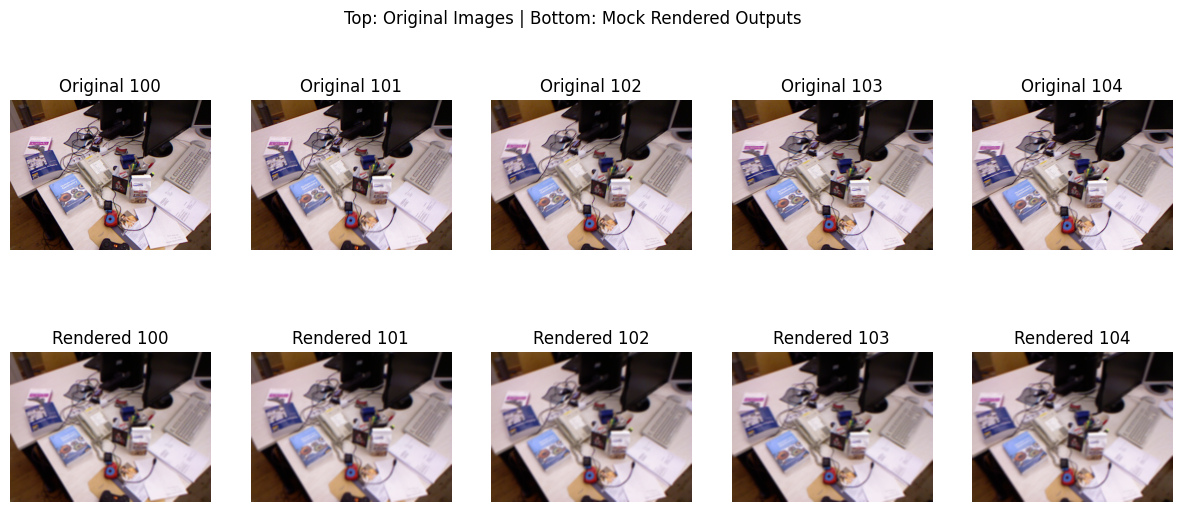

In [11]:
# Plot comparison
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
for i in range(5):
    original = imageio.imread(os.path.join(image_folder, sample_images[i]))
    rendered = cv2.cvtColor(rendered_images[i], cv2.COLOR_BGR2RGB)

    axs[0, i].imshow(original)
    axs[0, i].axis('off')
    axs[0, i].set_title(f"Original {i+100}")

    axs[1, i].imshow(rendered)
    axs[1, i].axis('off')
    axs[1, i].set_title(f"Rendered {i+100}")

plt.suptitle("Top: Original Images | Bottom: Mock Rendered Outputs")
plt.show()